In [1]:
import numpy as np
import pandas as pd
import cmath

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

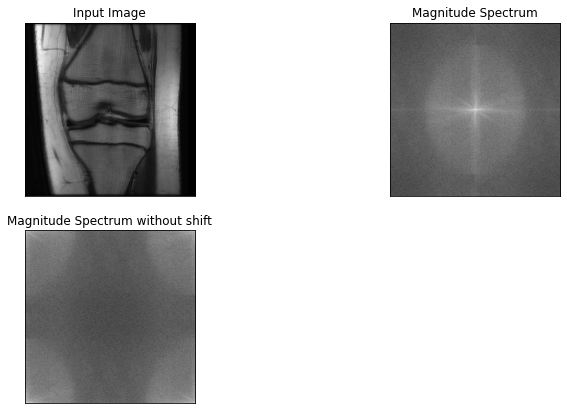

In [2]:
img = cv.imread('knee_image.png',0)
F = np.fft.fft2(img)

fshift = np.fft.fftshift(F)
magnitude_spectrum = 20*np.log(np.abs(fshift))

magnitude_spectrum_without_shift = 20*np.log(np.abs(F))

plt.figure(figsize=(12,7))
plt.subplot(221),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(222),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

plt.subplot(223),plt.imshow(magnitude_spectrum_without_shift, cmap = 'gray')
plt.title('Magnitude Spectrum without shift'), plt.xticks([]), plt.yticks([])

plt.show()


In [3]:
F.shape

(448, 441)

### Calculation of H matrix

In [4]:
import math
def calculate_cell_value(T, a, b, u=None, v= None):
    p = ((u+1)*a)+((v+1)*b)
    z = p * math.pi
    if (z==0):
        magnitude=0
        phase = 0
    else:
        sin_z = np.sin(z)
        magnitude =( T / z) * sin_z
        phase = -z
#     print(p)
#     print(z)
#     print(magnitude)
#     print(phase)
    return cmath.rect(magnitude, phase)

In [5]:
np.sin(1.256)

0.95085946050647

In [6]:
math.pi

3.141592653589793

In [7]:

from numpy import exp, abs, angle

def polar2z(r,theta):
    return cmath.rect(r,theta)

def z2polar(z):
    return ( abs(z), angle(z) )

In [8]:
polar2z(0.757053344,-1.256)

(0.23440098600350706-0.719851334250459j)

In [9]:
calculate_cell_value(1,0.1,0.1,1,1)

(0.2338723209471598-0.7197849919800408j)

In [10]:
H = [ [ 0 for i in range(441) ] for j in range(448) ]
for i in range(448):
    for j in range(441):
        H[i][j] = calculate_cell_value(1,0.1,0.1,i,j)

In [11]:
G = F*H

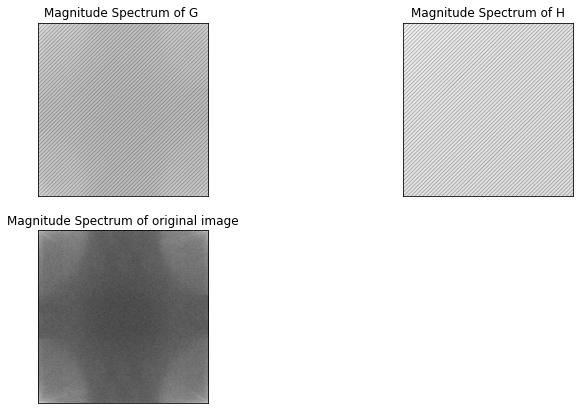

In [12]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

magnitude_spectrum_g = 20*np.log(np.abs(G))
magnitude_spectrum_f = 20*np.log(np.abs(F))
magnitude_spectrum_h = 20*np.log(np.abs(H))

plt.figure(figsize=(12,7))
plt.subplot(221),plt.imshow(magnitude_spectrum_g, cmap = 'gray')
plt.title('Magnitude Spectrum of G '), plt.xticks([]), plt.yticks([])

plt.subplot(222),plt.imshow(magnitude_spectrum_h, cmap = 'gray')
plt.title('Magnitude Spectrum of H'), plt.xticks([]), plt.yticks([])

plt.subplot(223),plt.imshow(magnitude_spectrum_f, cmap = 'gray')
plt.title('Magnitude Spectrum of original image'), plt.xticks([]), plt.yticks([])
plt.show()

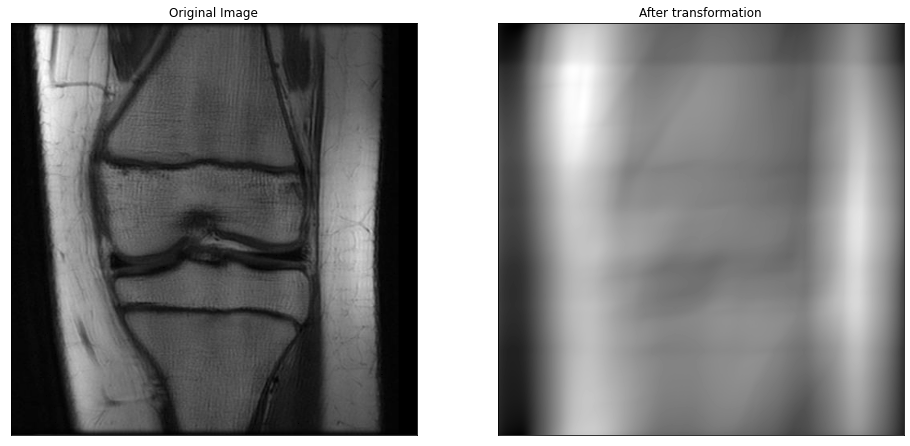

In [13]:
from numpy.fft import fft2, ifft2, fftshift, ifftshift


# shift FFT to the center
fft_img_shift = np.fft.fftshift(G)

#reverse the shift
fft_img_mod = np.fft.ifftshift(fft_img_shift)

# # reverse the 2D fourier transform
img_mod = np.fft.ifft2(fft_img_mod)

img_mod = np.abs(img_mod)

#show differences
plt.figure(figsize=(16,9))
plt.subplot(121),plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(img_mod, cmap='gray')
plt.title('After transformation'), plt.xticks([]), plt.yticks([])

plt.show()



### Calculating L2 distance between each pixel of original and blurred image

In [14]:
import math
def calculate_l1_distance(img,img2):
    dist = np.sum(abs(img[:] - img2[:]));
    return dist

def calculate_l2_distance(img,img2):
    dist = np.sqrt(np.sum((img[:] - img2[:])** 2));
    return dist

def calculate_RMSE(img,img2):
    m=img.shape[0]
    n= img.shape[1]
    rmse = np.sqrt(np.sum((img[:] - img2[:])** 2)/(m*n));
    return rmse

def calculate_PSNR(img,img2):
    psnr = 10* math.log10( (np.sum(img[:]** 2)) / (np.sum((img[:] - img2[:])** 2)) )
    return psnr

In [15]:
print('l1 distance between original and blurred image is',calculate_l1_distance(img,img_mod) )
print('l2 distance between original and blurred image is',calculate_l2_distance(img,img_mod) )
print('rmse between original and blurred image is',calculate_RMSE(img,img_mod) )
print('psnr between original and blurred image is',calculate_PSNR(img,img_mod) )

l1 distance between original and blurred image is 7046857.886778651
l2 distance between original and blurred image is 20344.48057757249
rmse between original and blurred image is 45.77077904850384
psnr between original and blurred image is -13.124184108492198


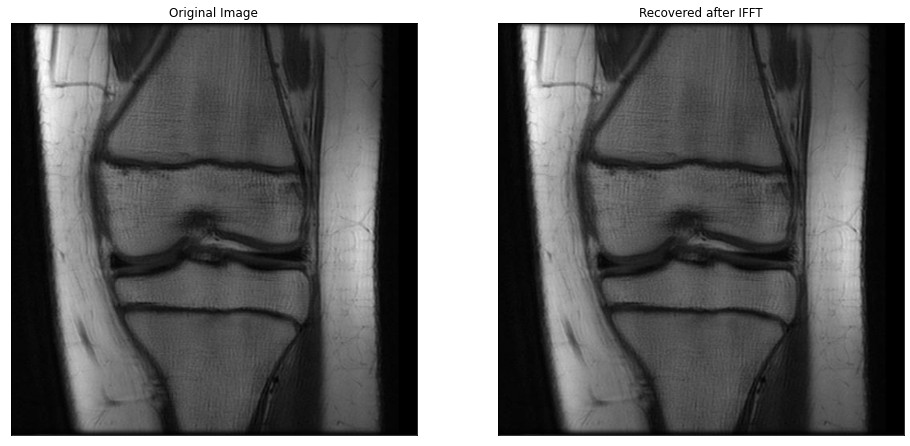

In [16]:
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('knee_image.png',0)

# 2D fourier transform
fft_img = np.fft.fft2(img)

# shifting FFT to the center
fft_img_shift = np.fft.fftshift(fft_img)

# reverse shift
fft_img_mod = np.fft.ifftshift(fft_img_shift)

# reverse the 2D fourier transform
img_mod = np.fft.ifft2(fft_img)


img_mod = np.abs(img_mod)

# show differences
plt.figure(figsize=(16,9))
plt.subplot(121),plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])


plt.subplot(122),plt.imshow(img_mod, cmap='gray')
plt.title('Recovered after IFFT'), plt.xticks([]), plt.yticks([])

plt.show()


In [17]:
print('l1 distance between original and recovered image is',calculate_l1_distance(img,img_mod) )
print('l2 distance between original and recovered image is',calculate_l2_distance(img,img_mod) )
print('rmse between original and recovered image is',calculate_RMSE(img,img_mod) )
print('psnr between original and recovered image is',calculate_PSNR(img,img_mod) )

l1 distance between original and recovered image is 2.8383788277034636e-09
l2 distance between original and recovered image is 9.14348752065695e-12
rmse between original and recovered image is 2.0570913346497318e-14
psnr between original and recovered image is 293.82251048572886
